# Notebook creates Average ROI chart

## Connect to database

In [1]:
import mysql.connector
import config
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cnx = mysql.connector.connect(
        host = config.host,
        user = config.user,
        password = config.password,
        database = 'movies'
)
cursor = cnx.cursor(buffered=True)

## Run queries

Query 1: Grab all horror movies with budget > 50,000. Order by descending ROIs

In [3]:
cursor.execute("""
SELECT
	title,
    revenue,
    budget,
    roi,
    release_date
FROM
	movies.tmdb_horror
WHERE
	budget >= 50000
ORDER BY
    roi DESC
;
""")

horror_data = cursor.fetchall()
column_names = ['title', 'revenue', 'budget', 'roi', 'release_date']
df_horror = pd.DataFrame(horror_data,columns=column_names)
df_horror.describe()

,revenue,budget,roi
count,7.240000e+02,7.240000e+02,724.000000
mean,5.079384e+07,1.588306e+07,1348.910138
std,7.953268e+07,2.200295e+07,15648.602079
min,2.000000e+00,5.000000e+04,-100.000000
25%,4.088250e+06,2.875000e+06,-15.825000
50%,2.028013e+07,8.500000e+06,137.460000
75%,6.413014e+07,2.000000e+07,431.350000
max,7.003817e+08,2.000000e+08,413233.000000


In [4]:
#drop 'The Blair Witch Prohect' as an outlier
df_horror_noBWP = df_horror.drop([0])

In [5]:
df_horror_noBWP.describe()

,revenue,budget,roi
count,7.230000e+02,7.230000e+02,723.000000
mean,5.052108e+07,1.590494e+07,779.222600
std,7.924815e+07,2.201030e+07,3150.030866
min,2.000000e+00,5.000000e+04,-100.000000
25%,4.076500e+06,2.900000e+06,-16.230000
50%,2.000000e+07,8.500000e+06,137.430000
75%,6.393862e+07,2.000000e+07,430.045000
max,7.003817e+08,2.000000e+08,42564.400000


In [6]:
#calc average ROI
roi_h = df_horror_noBWP['roi'].mean()

Query 2: Grab all comedy movies with budget > 50,000. Order by descending ROIs

In [7]:
cursor.execute("""
SELECT
	title,
    revenue,
    budget,
    roi,
    release_date
FROM
	movies.tmdb_comedy
WHERE
	budget >= 50000
ORDER BY
    roi DESC
;
""")

comedy_data = cursor.fetchall()
column_names = ['title', 'revenue', 'budget', 'roi', 'release_date']
df_comedy = pd.DataFrame(comedy_data,columns=column_names)
df_comedy.describe()

,revenue,budget,roi
count,1.627000e+03,1.627000e+03,1627.000000
mean,1.132029e+08,3.574209e+07,458.371346
std,1.504551e+08,3.547945e+07,1676.809882
min,9.128263e+06,6.500000e+04,-88.480000
25%,2.531994e+07,1.100000e+07,47.805000
50%,5.788106e+07,2.500000e+07,173.240000
75%,1.400809e+08,5.000000e+07,391.720000
max,1.156731e+09,2.300000e+08,43861.700000


In [8]:
#calc average ROI
roi_c = df_comedy['roi'].mean()

Query 3: Grab all adventure movies with budget > 50,000. Order by descending ROIs

In [9]:
cursor.execute("""
SELECT
	title,
    revenue,
    budget,
    roi,
    release_date
FROM
	movies.tmdb_adventure
WHERE
	budget >= 50000
ORDER BY
    roi DESC
;
""")

adventure_data = cursor.fetchall()
column_names = ['title', 'revenue', 'budget', 'roi', 'release_date']
df_adventure = pd.DataFrame(adventure_data,columns=column_names)
df_adventure.describe()

,revenue,budget,roi
count,1.113000e+03,1.113000e+03,1113.000000
mean,2.100953e+08,6.476563e+07,347.211429
std,3.009948e+08,6.500866e+07,1222.363192
min,2.425000e+04,5.000000e+04,-99.780000
25%,1.797974e+07,1.400000e+07,3.930000
50%,8.215018e+07,4.000000e+07,122.060000
75%,2.774484e+08,1.000000e+08,333.470000
max,2.147484e+09,5.000000e+08,24900.000000


In [10]:
#calc average ROI
roi_ad = df_adventure['roi'].mean()

Query 4: Grab all action movies with budget > 50,000. Order by descending ROIs

In [11]:
cursor.execute("""
SELECT
	title,
    revenue,
    budget,
    roi,
    release_date
FROM
	movies.tmdb_action
WHERE
	budget >= 50000
ORDER BY
    roi DESC
;
""")

action_data = cursor.fetchall()
column_names = ['title', 'revenue', 'budget', 'roi', 'release_date']
df_action = pd.DataFrame(action_data,columns=column_names)
df_action.describe()

,revenue,budget,roi
count,1.620000e+03,1.620000e+03,1620.000000
mean,1.453119e+08,4.979605e+07,299.896228
std,2.431106e+08,5.642380e+07,1232.731029
min,6.325420e+05,6.900000e+04,-98.840000
25%,1.234734e+07,9.500000e+06,2.515000
50%,5.245100e+07,3.000000e+07,110.445000
75%,1.611758e+08,7.000000e+07,291.295000
max,2.147484e+09,5.000000e+08,26150.000000


In [12]:
#calc average ROI
roi_ac = df_action['roi'].mean()

Add ROIs as list of dictionaries.

In [13]:
rois = [
    {'genre': 'Comedy', 'roi': roi_c},
    {'genre': 'Adventure', 'roi': roi_ad},
    {'genre': 'Action', 'roi': roi_ac},
    {'genre': 'Horror', 'roi': roi_h}
]

Create bar chart

In [14]:
import seaborn as sns
sns.set_style('whitegrid')

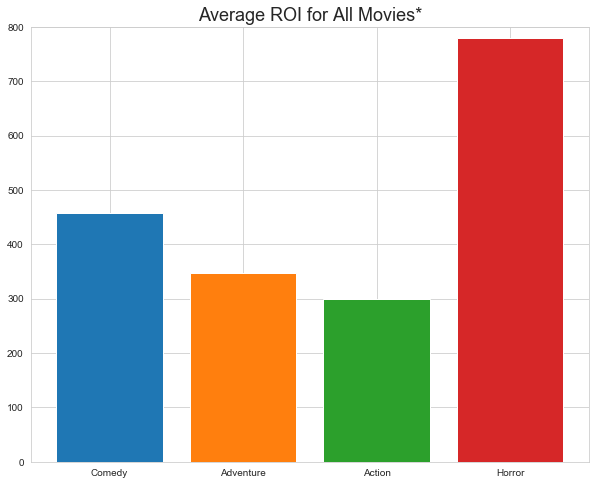

In [15]:
fig2 = plt.figure(figsize=(10,8))
ax_avgroi = fig2.add_subplot(111)
ax_avgroi.set_title('Average ROI for All Movies*', {'fontsize': 18})
ax_avgroi.set_ylim(0, 800)

for roi in rois:
    ax_avgroi.bar(roi['genre'], roi['roi'], label = roi['genre'])

In [16]:
cnx.close()